## Formula to calculate average runs = Runs/(Inns - NO)

In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [55]:
df = pd.read_csv("virat.csv")

small_constant = 1e-10
df['log_Runs'] = np.log(df['Runs'] + small_constant)
df['log_Inns'] = np.log(df['Inns'] + small_constant)
df['log_NO'] = np.log(df['NO'] + small_constant)
df['log_Avg'] = np.log(df['Avg'] + small_constant)
df

,Unnamed: 0,Span,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100s,50s,0s,4s,6s,log_Runs,log_Inns,log_NO,log_Avg
0,overview,0.0,109,185,11,8479,254,48.72,15320,55.34,28,28,14,950,24,9.045348,5.220356e+00,2.397895e+00,3.886090
1,vs Australia,0.0,25,44,1,2042,186,47.48,3896,52.41,8,5,3,227,5,7.621685,3.784190e+00,1.000000e-10,3.860309
2,vs Bangladesh,0.0,6,9,1,437,204,54.62,633,69.03,2,0,1,49,1,6.079933,2.197225e+00,1.000000e-10,4.000400
3,vs England,0.0,28,50,3,1991,235,42.36,3824,52.06,5,9,6,235,2,7.596392,3.912023e+00,1.098612e+00,3.746205
4,vs New Zealand,0.0,11,21,2,866,211,45.57,1606,53.92,3,3,1,105,3,6.763885,3.044522e+00,6.931472e-01,3.819250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3rd position,0.0,4,6,1,97,41,19.40,175,55.42,0,0,0,13,0,4.574711,1.791759e+00,1.000000e-10,2.965273
107,4th position,0.0,85,139,7,6934,254,52.53,12162,57.01,24,19,12,771,17,8.844192,4.934474e+00,1.945910e+00,3.961384
108,5th position,0.0,25,30,3,1033,107,38.25,2179,47.40,3,6,1,124,5,6.940222,3.401197e+00,1.098612e+00,3.644144
109,6th position,0.0,5,9,0,404,116,44.88,783,51.59,1,3,1,41,2,6.001415,2.197225e+00,-2.302585e+01,3.803992


In [56]:
X = df.drop(columns=['Avg','Unnamed: 0','Span','Mat','HS','BF','SR','100s','50s','0s','4s','6s',"Inns", "NO", "Runs"])
X   

,log_Runs,log_Inns,log_NO,log_Avg
0,9.045348,5.220356e+00,2.397895e+00,3.886090
1,7.621685,3.784190e+00,1.000000e-10,3.860309
2,6.079933,2.197225e+00,1.000000e-10,4.000400
3,7.596392,3.912023e+00,1.098612e+00,3.746205
4,6.763885,3.044522e+00,6.931472e-01,3.819250
...,...,...,...,...
106,4.574711,1.791759e+00,1.000000e-10,2.965273
107,8.844192,4.934474e+00,1.945910e+00,3.961384
108,6.940222,3.401197e+00,1.098612e+00,3.644144
109,6.001415,2.197225e+00,-2.302585e+01,3.803992


In [57]:
y = df['log_Avg']
y

0      3.886090
1      3.860309
2      4.000400
3      3.746205
4      3.819250
         ...   
106    2.965273
107    3.961384
108    3.644144
109    3.803992
110    2.397895
Name: log_Avg, Length: 111, dtype: float64

In [58]:
df.corr()

,Span,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100s,50s,0s,4s,6s,log_Runs,log_Inns,log_NO,log_Avg
Span,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mat,NaN,1.000000,0.968020,0.860528,0.960933,0.577910,0.133044,0.964274,0.144398,0.919117,0.950186,0.929003,0.962205,0.933433,0.791059,0.849085,0.512173,0.221261
Inns,NaN,0.968020,1.000000,0.878171,0.985068,0.587854,0.115405,0.990099,0.131229,0.935528,0.982336,0.959179,0.987322,0.950296,0.796430,0.859083,0.491411,0.207128
NO,NaN,0.860528,0.878171,1.000000,0.868722,0.562627,0.190858,0.863634,0.219061,0.816195,0.884751,0.812239,0.867451,0.901189,0.708445,0.755712,0.640879,0.255109
Runs,NaN,0.960933,0.985068,0.868722,1.000000,0.633771,0.214226,0.998543,0.200604,0.976882,0.963668,0.948856,0.999345,0.970890,0.807081,0.841640,0.500481,0.291260
HS,NaN,0.577910,0.587854,0.562627,0.633771,1.000000,0.623516,0.621206,0.577004,0.630285,0.571754,0.580813,0.632430,0.625356,0.833211,0.724674,0.541449,0.711437
Avg,NaN,0.133044,0.115405,0.190858,0.214226,0.623516,1.000000,0.190355,0.684991,0.294325,0.127767,0.089454,0.207225,0.244958,0.454241,0.205856,0.348504,0.954718
BF,NaN,0.964274,0.990099,0.863634,0.998543,0.621206,0.190355,1.000000,0.166158,0.971202,0.970033,0.953677,0.998804,0.965800,0.808340,0.849216,0.494168,0.272367
SR,NaN,0.144398,0.131229,0.219061,0.200604,0.577004,0.684991,0.166158,1.000000,0.254611,0.115271,0.118334,0.193969,0.239735,0.328692,0.156745,0.337362,0.669030
100s,NaN,0.919117,0.935528,0.816195,0.976882,0.630285,0.294325,0.971202,0.254611,1.000000,0.898752,0.911165,0.973492,0.963194,0.786464,0.795388,0.495375,0.353853


<AxesSubplot: >

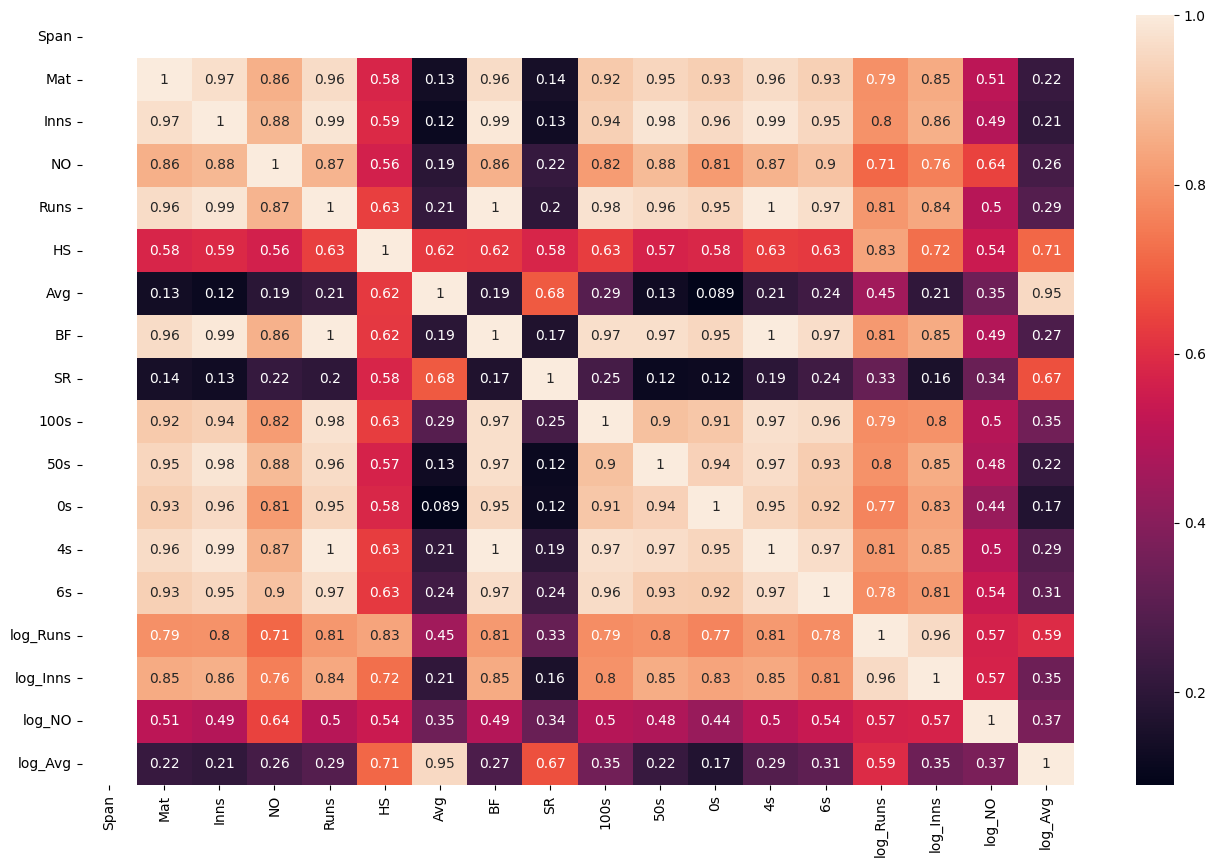

In [59]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)

In [60]:
X = df[['log_Runs', 'log_Inns', 'log_NO']]
y = df['log_Avg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
actual_predictions = np.exp(predictions)

score = r2_score(np.exp(y_test), actual_predictions)
score


0.9845096645267872

In [61]:
greater98 = 0
less98 = 0

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    prediction_train = model.predict(X_train)
    score = r2_score(y_test, predictions)
    if(score>0.98):
        greater98+=1
    else:
        less98+=1

        
print(greater98, less98)

850 150
